<a href="https://colab.research.google.com/github/antoinexp/markov-chains-COM-516/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
class DatasetGenerator(object):
  def __init__(self, N=100):
    self.N = N
    self.x = None
    self.v = None
    self.refresh()
  
  def refresh(self):
    raise Exception("undefined")

In [6]:
class G1(DatasetGenerator):
  def refresh(self):
    self.x = st.uniform().rvs((self.N,2))
    self.v = st.uniform().rvs((self.N,))

In [7]:
class G2(DatasetGenerator):
  def refresh(self):
    self.x = st.uniform().rvs((self.N,2))
    self.v = np.exp(st.norm(-0.85, 1.3).rvs((self.N,)))

In [8]:
g1 = G1()

In [24]:
class MCMCSolver: 
    def __init__(self, dataset,lmbd,beta = 0.1):
        self.dataset = dataset
        self.state = np.random.binomial(1, 0.5, dataset.N) #randomly initialize state
        self.lmbd = lmbd
        self.beta = beta
        
        
    #code from solvers 
    def dist(self,pt1: np.ndarray, pt2: np.ndarray) -> np.float:
        return np.linalg.norm(pt1 - pt2, ord=2)
    
    def objective(self,state):
        #TODO
        return 0
        
    #compute the radius of the state
    #direct computation, probably more clever way to compute radius difference
    def radius(self,state):
        radius = 0
        for i in state:
            if i > 0:
                for j in state:
                    if j > 0:
                        temp = self.dist(self.dataset.x[i],self.dataset.x[j])
                        if temp > radius:
                            radius = temp
        return 0
    
    def compute_diff(self,state_1,state_2,i):
        diff = (state_1[i] - state_2[i])*self.dataset.v[i] \
        - self.lmbd*self.dataset.N*np.pi*(self.radius(state_1)-self.radius(state_2))
        return diff

    def acceptance_proba(self,diff,beta):
        proba = np.exp(beta*diff)
        return np.minimum(1.0,proba)
    
    def solve(self,n_it):
        print("Initial state:",self.state)
        n_states = []
        objectives = []
        for it in range(n_it):
            next_state = self.state.copy()
            
            #flip one state at random
            i = np.random.choice(self.dataset.N)
            next_state[i] = 1^next_state[i]
                        
            #update state with acceptance probability
            diff = self.compute_diff(self.state, next_state,i)
            if np.random.uniform() < self.acceptance_proba(diff, self.beta):
                self.state = next_state
            
            #record number of states and objective for plotting, as per project description
            if (it % 5) == 0:
                n_states.append(self.state.sum())
                objectives.append
                
            #beta scheduling    
            if (it % 100) == 0:
                self.beta = self.beta  
        
        print("Final state:",self.state)
        return n_states,objectives

In [25]:
mcmc = MCMCSolver(dataset = g1, lmbd = 10,beta = 50)
n_states, objectives = mcmc.solve(n_it = 1000)

Initial state: [1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1]
Final state: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


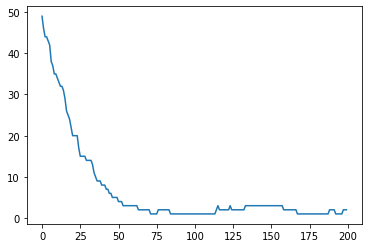

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_states) #number of selected city is low with higher lambda and beta